# Realtor Real Estate USA 

# Problem Statement and Objectives
- The objective of this work is to perform pre-processing, data cleaning and feature engineering to predict the home prices according to the available fatures in the dataset. 

# About the Dataset

This dataset shows real estate listing in USA. "csv. file" contains 10 columns:
* realtor-data.csv (100k+ entries)
* status (Housing status - a. ready for sale or b. ready to build)
* bed (# of beds)
* bath (# of bathrooms)
* acre_lot (Property / Land size in acres)
* city (city name)
* state (state name)
* zip_code (postal code of the area)
* house_size (house area/size/living space in square feet)
* prev_sold_date (Previously sold date)
* price (Housing price, it is either the current listing price or recently sold price if the house is sold recently)


# Machine Leraning Models:
- Linear Regression
- Gradient Boosting
- Neural Networks (Simple, Medium, Complex)

# Import the Dataset

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
sns.set()

In [2]:
df = pd.read_csv('realtor-data.zip.csv')
df.head()

,brokered_by,status,price,bed,bath,acre_lot,street,city,state,zip_code,house_size,prev_sold_date
0,103378.0,for_sale,105000.0,3.0,2.0,0.12,1962661.0,Adjuntas,Puerto Rico,601.0,920.0,NaN
1,52707.0,for_sale,80000.0,4.0,2.0,0.08,1902874.0,Adjuntas,Puerto Rico,601.0,1527.0,NaN
2,103379.0,for_sale,67000.0,2.0,1.0,0.15,1404990.0,Juana Diaz,Puerto Rico,795.0,748.0,NaN
3,31239.0,for_sale,145000.0,4.0,2.0,0.10,1947675.0,Ponce,Puerto Rico,731.0,1800.0,NaN
4,34632.0,for_sale,65000.0,6.0,2.0,0.05,331151.0,Mayaguez,Puerto Rico,680.0,NaN,NaN


In [3]:
df_copy = df.copy()

In [4]:
df.describe()

,brokered_by,price,bed,bath,acre_lot,street,zip_code,house_size
count,2.221849e+06,2.224841e+06,1.745065e+06,1.714611e+06,1.900793e+06,2.215516e+06,2.226083e+06,1.657898e+06
mean,5.293989e+04,5.241955e+05,3.275841e+00,2.496440e+00,1.522303e+01,1.012325e+06,5.218668e+04,2.714471e+03
std,3.064275e+04,2.138893e+06,1.567274e+00,1.652573e+00,7.628238e+02,5.837635e+05,2.895408e+04,8.081635e+05
min,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00
25%,2.386100e+04,1.650000e+05,3.000000e+00,2.000000e+00,1.500000e-01,5.063128e+05,2.961700e+04,1.300000e+03
50%,5.288400e+04,3.250000e+05,3.000000e+00,2.000000e+00,2.600000e-01,1.012766e+06,4.838200e+04,1.760000e+03
75%,7.918300e+04,5.500000e+05,4.000000e+00,3.000000e+00,9.800000e-01,1.521173e+06,7.807000e+04,2.413000e+03
max,1.101420e+05,2.147484e+09,4.730000e+02,8.300000e+02,1.000000e+05,2.001357e+06,9.999900e+04,1.040400e+09


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2226382 entries, 0 to 2226381
Data columns (total 12 columns):
 #   Column          Dtype  
---  ------          -----  
 0   brokered_by     float64
 1   status          object 
 2   price           float64
 3   bed             float64
 4   bath            float64
 5   acre_lot        float64
 6   street          float64
 7   city            object 
 8   state           object 
 9   zip_code        float64
 10  house_size      float64
 11  prev_sold_date  object 
dtypes: float64(8), object(4)
memory usage: 203.8+ MB


In [6]:
print(df.status.value_counts(),sep = '\n')
print("*"*35)
print(df.city.value_counts(),sep = '\n')
print("*"*35)
print(df.state.value_counts(),sep = '\n')
print("*"*35)

status
for_sale          1389306
sold               812009
ready_to_build      25067
Name: count, dtype: int64
***********************************
city
Houston                        23862
Chicago                        18238
New York City                  12634
Jacksonville                   11743
Philadelphia                   10449
                               ...  
Angel Ifre                         1
Colfax County Moreno Valley        1
Little Sioux                       1
Trementina                         1
Kahlotus                           1
Name: count, Length: 20098, dtype: int64
***********************************
state
Florida                 249432
California              227215
Texas                   208335
New York                103159
North Carolina           85745
Illinois                 85280
Georgia                  80977
Pennsylvania             78373
Arizona                  72825
Virginia                 68763
Washington               62461
Ohio             

# 1. Dealing with Null Values

- Handling missing values (null values) and outliers is a crucial part of data preprocessing. The order in which you perform these steps can impact the results of your analysis or model training. Generally, the recommended approach is to first handle missing values and then address outliers through Step-by-Step Process

- Remove or Impute Null Values: 
Null values can interfere with calculations and statistical measures, and most machine learning algorithms do not accept missing values. Decide whether to remove rows/columns with missing values or to impute (fill in) the missing values using techniques like mean/median imputation, forward fill, or using more advanced methods like K-Nearest Neighbors.

- Let's find out about Null values

In [7]:
df.isnull().sum()

brokered_by         4533
status                 0
price               1541
bed               481317
bath              511771
acre_lot          325589
street             10866
city                1407
state                  8
zip_code             299
house_size        568484
prev_sold_date    734297
dtype: int64

- Percentage of Null values in each column

In [8]:
def find_missings(df):
    return round(df.isnull().sum()/df.shape[0]*100,2)

In [9]:
find_missings(df)

brokered_by        0.20
status             0.00
price              0.07
bed               21.62
bath              22.99
acre_lot          14.62
street             0.49
city               0.06
state              0.00
zip_code           0.01
house_size        25.53
prev_sold_date    32.98
dtype: float64

- missing values of the column we are interested in are as follow:
 "bed": 21.62%, "bath":22.99%, "acre_lot": 14.62%, "house_size": 25.53%, "prev_sold_date": 32.98%, "street": 0.49%, "city": 0.06%, "price": 0.07%


- Drop rows where column 'price' has null values

In [10]:
df = df.dropna(subset=['price'])
df.head()

,brokered_by,status,price,bed,bath,acre_lot,street,city,state,zip_code,house_size,prev_sold_date
0,103378.0,for_sale,105000.0,3.0,2.0,0.12,1962661.0,Adjuntas,Puerto Rico,601.0,920.0,NaN
1,52707.0,for_sale,80000.0,4.0,2.0,0.08,1902874.0,Adjuntas,Puerto Rico,601.0,1527.0,NaN
2,103379.0,for_sale,67000.0,2.0,1.0,0.15,1404990.0,Juana Diaz,Puerto Rico,795.0,748.0,NaN
3,31239.0,for_sale,145000.0,4.0,2.0,0.10,1947675.0,Ponce,Puerto Rico,731.0,1800.0,NaN
4,34632.0,for_sale,65000.0,6.0,2.0,0.05,331151.0,Mayaguez,Puerto Rico,680.0,NaN,NaN


- Choosing wanted columns

In [11]:
df=df[['status', 'bed', 'bath', 'acre_lot', 'street', 'city', 'state', 'zip_code', 'house_size', 'price']]
df.head()

,status,bed,bath,acre_lot,street,city,state,zip_code,house_size,price
0,for_sale,3.0,2.0,0.12,1962661.0,Adjuntas,Puerto Rico,601.0,920.0,105000.0
1,for_sale,4.0,2.0,0.08,1902874.0,Adjuntas,Puerto Rico,601.0,1527.0,80000.0
2,for_sale,2.0,1.0,0.15,1404990.0,Juana Diaz,Puerto Rico,795.0,748.0,67000.0
3,for_sale,4.0,2.0,0.10,1947675.0,Ponce,Puerto Rico,731.0,1800.0,145000.0
4,for_sale,6.0,2.0,0.05,331151.0,Mayaguez,Puerto Rico,680.0,NaN,65000.0


## 1-1    Interpolation Method:
- To fill null values using interpolation in Python, you can use the interpolate() method provided by the Pandas library. This method works by estimating the missing values based on surrounding data points.
- This method is very flexible and useful when you need to estimate missing data based on trends in the dataset.

- Dataframe with no quantitative values

In [12]:
df_no_interp=df[['status', 'street', 'city', 'state', 'zip_code', 'price']]
df_no_interp.head()

,status,street,city,state,zip_code,price
0,for_sale,1962661.0,Adjuntas,Puerto Rico,601.0,105000.0
1,for_sale,1902874.0,Adjuntas,Puerto Rico,601.0,80000.0
2,for_sale,1404990.0,Juana Diaz,Puerto Rico,795.0,67000.0
3,for_sale,1947675.0,Ponce,Puerto Rico,731.0,145000.0
4,for_sale,331151.0,Mayaguez,Puerto Rico,680.0,65000.0


- Dataframe to be used for linear interpolation method

In [13]:
# Quantitative data with null values
df_interp = df[["bath", "bed", "acre_lot", "house_size"]]
df_interp.head()

,bath,bed,acre_lot,house_size
0,2.0,3.0,0.12,920.0
1,2.0,4.0,0.08,1527.0
2,1.0,2.0,0.15,748.0
3,2.0,4.0,0.10,1800.0
4,2.0,6.0,0.05,NaN


In [14]:
# filling null values
df_interpolated = df_interp.interpolate(method='linear')
df_interpolated.head()

,bath,bed,acre_lot,house_size
0,2.0,3.0,0.12,920.0
1,2.0,4.0,0.08,1527.0
2,1.0,2.0,0.15,748.0
3,2.0,4.0,0.10,1800.0
4,2.0,6.0,0.05,2160.0


- Let's concatenate both dataframes (df_interp & de_no_interp) 

In [15]:
df_concat = pd.concat([df_interpolated, df_no_interp], axis=1)
df_concat.head()

,bath,bed,acre_lot,house_size,status,street,city,state,zip_code,price
0,2.0,3.0,0.12,920.0,for_sale,1962661.0,Adjuntas,Puerto Rico,601.0,105000.0
1,2.0,4.0,0.08,1527.0,for_sale,1902874.0,Adjuntas,Puerto Rico,601.0,80000.0
2,1.0,2.0,0.15,748.0,for_sale,1404990.0,Juana Diaz,Puerto Rico,795.0,67000.0
3,2.0,4.0,0.10,1800.0,for_sale,1947675.0,Ponce,Puerto Rico,731.0,145000.0
4,2.0,6.0,0.05,2160.0,for_sale,331151.0,Mayaguez,Puerto Rico,680.0,65000.0


In [16]:
df_concat.isnull().sum()
# Now, null values of columns with quntitative values have been filled up using linear interpolation method. 
# Non-quantitative columns still have null values such as: "street", "city", "state", "zip_code"

bath              0
bed               0
acre_lot          0
house_size        0
status            0
street        10864
city           1404
state             8
zip_code        298
price             0
dtype: int64

In [17]:
def find_missings(df):
    return round(df.isnull().sum()/df.shape[0]*100,2)

In [18]:
find_missings(df_concat)

bath          0.00
bed           0.00
acre_lot      0.00
house_size    0.00
status        0.00
street        0.49
city          0.06
state         0.00
zip_code      0.01
price         0.00
dtype: float64

- Let's dropna() the interpolated dataframe to remove the rest of the null values in categoical columns such as street, city, zip_code, state

In [19]:
df_concat.dropna(inplace=True)
df_concat.isnull().sum() # There are no null values left in this dataframe

bath          0
bed           0
acre_lot      0
house_size    0
status        0
street        0
city          0
state         0
zip_code      0
price         0
dtype: int64

## 1-2  K-Nearest Neighbors Method

Dealing with null values in a dataset using the K-Nearest Neighbors (KNN) method can be very time-consuming and, in some cases, infeasible due to several reasons:

    1. KNN is computationally expensive:
KNN stores all training data and calculates distances between the missing data point and every other point in the dataset at the time of prediction. This process becomes computationally intensive because:
    For every null value that needs imputation, the algorithm has to compute the distance from that data point to all other points in the dataset. If the dataset is large or high-dimensional, this results in a high number of distance calculations.


    2. Dimensionality issues:
When datasets have many features, distance computations in KNN can become highly inefficient. If you are imputing null values in multiple columns, KNN has to calculate distances across these high-dimensional feature spaces, which slows down the process significantly.

    3. Distance calculations with missing values:

The KNN algorithm requires complete data to calculate distances, but missing values create gaps. In practice, handling these gaps can involve filling in multiple missing values iteratively, which means: For every null value in every row, KNN has to be applied, leading to exponential growth in the number of distance computations.
    
    4. No clear distinction between important and unimportant features:

KNN treats all features equally when computing distances. If many features have null values, the algorithm has to compute distances for all features regardless of whether some are more relevant to the prediction task. This can waste computation time on irrelevant features, further slowing the imputation process.

    5. Iterative nature of the process:

For each missing value, the algorithm often needs to run multiple iterations (depending on the number of missing entries and the size of the dataset), which makes KNN for imputation extremely slow compared to other imputation methods like mean, median, or regression-based techniques.

Because of these factors, imputing null values using KNN on large or complex datasets becomes both time-consuming and computationally inefficient.

## KNN Code to deal with Null valus:
- Null values in columns of bed, bath, acre_lot, house_size will be replaced/imputed using K-Nearest Neighbors (KNN). Hoever, it was very time-consuming. So I only used interpolate() method to fill the null values. Thus, The code below is marked down.

df_null = df[["bath", "bed", "acre_lot", "house_size"]]
df_null

from sklearn.impute import KNNImputer
#Initialize the KNNImputer with the desired number of neighbors
imputer = KNNImputer(n_neighbors=3)

fit=imputer.fit_transform(df_null)

df_imputed = pd.DataFrame(fit, columns=df_null.columns)
df_imputed

# 2. Dealing with Outliers


- In this section, we will detect and handle outliers in quantitative columns such as : "bed" , "bath", "acre_lot", "house_size"
- Outliers can skew and mislead the training process of machine learning models. Therefore, it is important to deal with outliers before doing any modeling.  
- Outliers should be identified using statistical methods (like z-scores or IQR) and decide whether to remove them or to transform the data to mitigate their impact.
- We will use both z-score and IQR  methods to take care of outliers.

## 2-1  Z-Score Method

- The Z-score method is a popular statistical technique to detect outliers in a dataset. It measures how many standard deviations a data point is from the mean. Outliers are typically considered data points with a Z-score greater than a threshold, often 3 or -3, indicating that they are far from the mean.
- You can either remove them, as shown above, or replace them with more reasonable values (mean, median, etc.).

- Finding upper and lower limits of outliers using z-score method for different columns

In [20]:
upper_limit_b = df_concat['bed'].mean() + 3*df_concat['bed'].std() 
lower_limit_b = df_concat['bed'].mean() - 3*df_concat['bed'].std() 
print(upper_limit_b)
lower_limit_b

8.105720862674751


-1.5135477782224176

In [21]:
# Finidng upper and lower limits of outliers using z-score method:
upper_limit_ba = df_concat['bath'].mean() + 3*df_concat['bath'].std() 
lower_limit_ba = df_concat['bath'].mean() - 3*df_concat['bath'].std() 
print(upper_limit_ba)
lower_limit_ba

7.39136449053414


-2.359043013624606

In [22]:
# Finidng upper and lower limits of outliers using z-score method:
upper_limit_acre_lot = df_concat['acre_lot'].mean() + 3*df_concat['acre_lot'].std() 
lower_limit_acre_lot = df_concat['acre_lot'].mean() - 3*df_concat['acre_lot'].std() 
print(upper_limit_acre_lot)
lower_limit_acre_lot

2261.727327564814


-2231.9384170716294

In [23]:
# Finidng upper and lower limits of outliers using z-score method:
upper_limit_house_size = df_concat['house_size'].mean() + 3*df_concat['house_size'].std() 
lower_limit_house_size = df_concat['house_size'].mean() - 3*df_concat['house_size'].std() 
print(upper_limit_house_size)
lower_limit_house_size

3444293.879154508


-3436428.0983464606

## 2-1A Trimming method
- Delete the outlier data using upper limit and lower limit values

In [24]:
# Only keep the data between upper and lower limit of "bed" column:
df_trim = df_concat.loc[(df_concat['bed']>=lower_limit_b) & (df_concat['bed']<=upper_limit_b)]
print("trimmed_df: ", len(df_trim))
print("not-trimmed_df: ", len(df_concat))

trimmed_df:  2201594
not-trimmed_df:  2212488


Text(0.5, 1.0, 'Boxplot of Dataset without outlier')

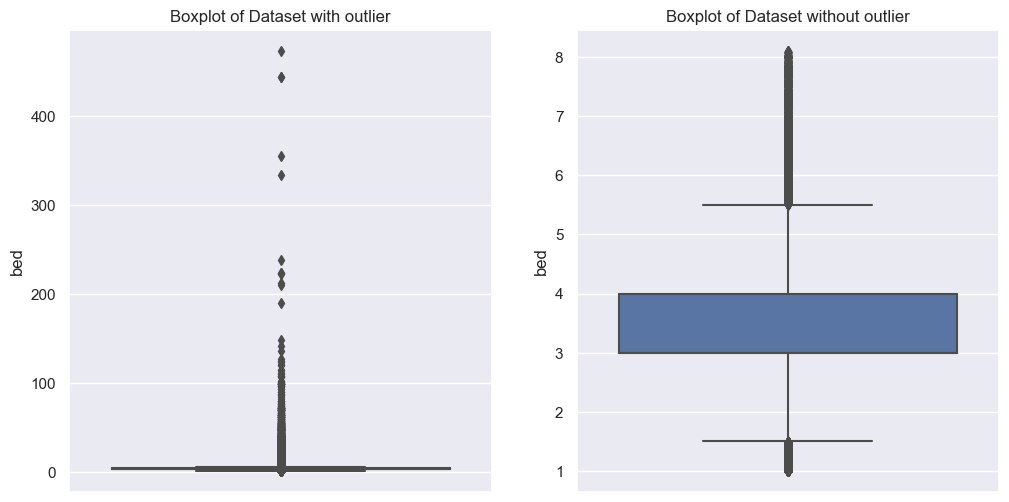

In [25]:
import matplotlib.pyplot as plt

# Create a figure with two subplots (1 row, 2 columns)
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# First boxplot from df_concat
sns.boxplot(y='bed', data=df_concat, ax=axes[0])
axes[0].set_title('Boxplot of Dataset with outlier')

# Second boxplot from df_trim
sns.boxplot(y='bed', data=df_trim, ax=axes[1])
axes[1].set_title('Boxplot of Dataset without outlier')


In [26]:
# Only keep the data between upper and lower limit of "bath" column:
df_trim = df_concat.loc[(df_concat['bath']>lower_limit_ba) & (df_concat['bath']<upper_limit_ba)]
print("new_df: ", len(df_trim))
print("old_df: ", len(df_concat))

new_df:  2199964
old_df:  2212488


Text(0.5, 1.0, 'Boxplot of Dataset without outlier')

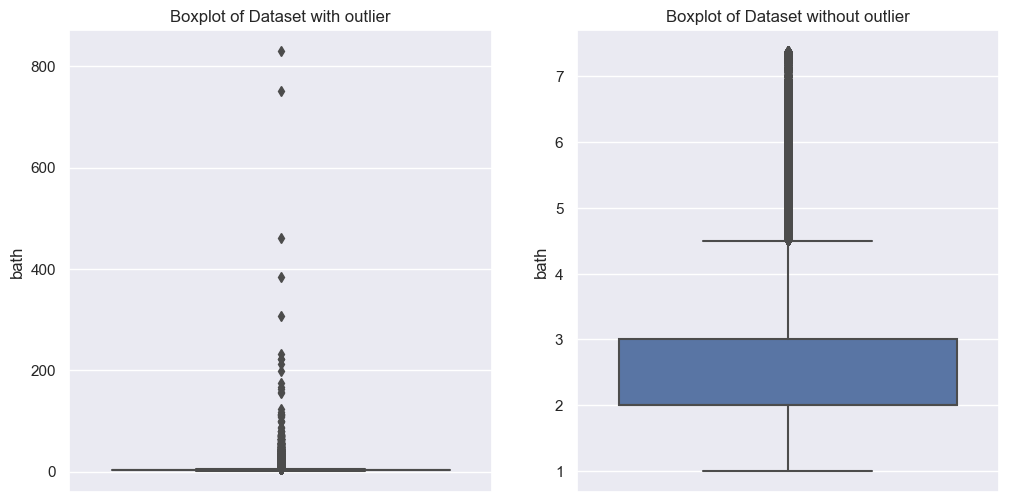

In [27]:
# Create a figure with two subplots (1 row, 2 columns)
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# First boxplot from df_concat
sns.boxplot(y='bath', data=df_concat, ax=axes[0])
axes[0].set_title('Boxplot of Dataset with outlier')

# Second boxplot from df_trim
sns.boxplot(y='bath', data=df_trim, ax=axes[1])
axes[1].set_title('Boxplot of Dataset without outlier')

In [28]:
# Only keep the data between upper and lower limit of "acre_lot" column:
df_trim = df_concat.loc[(df_concat['acre_lot']>=lower_limit_acre_lot) & (df_concat['acre_lot']<=upper_limit_acre_lot)]
print("new_df: ", len(df_trim))
print("old_df: ", len(df_concat))

new_df:  2211293
old_df:  2212488


Text(0.5, 1.0, 'Boxplot of Dataset without outlier')

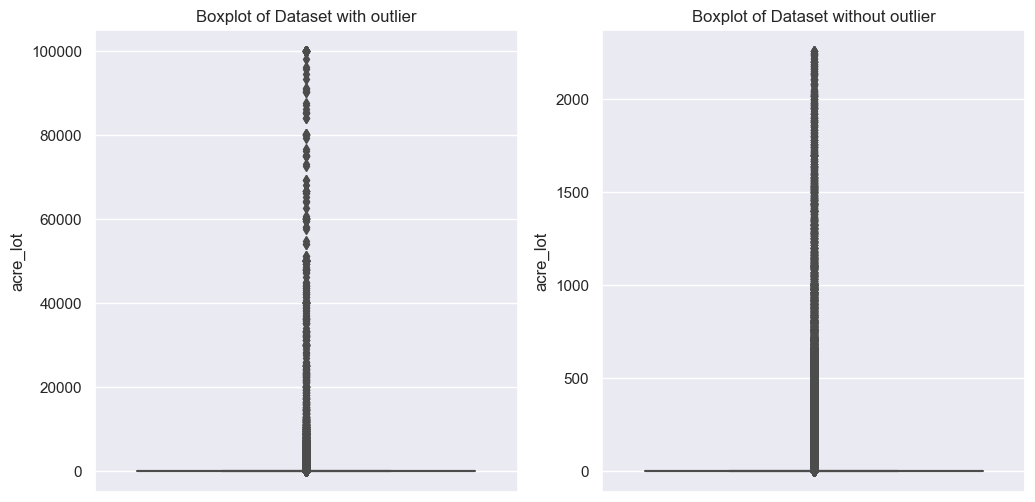

In [29]:
# Create a figure with two subplots (1 row, 2 columns)
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# First boxplot from df_concat
sns.boxplot(y='acre_lot', data=df_concat, ax=axes[0])
axes[0].set_title('Boxplot of Dataset with outlier')

# Second boxplot from df_trim
sns.boxplot(y='acre_lot', data=df_trim, ax=axes[1])
axes[1].set_title('Boxplot of Dataset without outlier')

In [30]:
# Only keep the data between upper and lower limit of "bed" column:
df_trim = df_concat.loc[(df_concat['house_size']>lower_limit_house_size) & (df_concat['house_size']<upper_limit_house_size)]
print("new_df: ", len(df_trim))
print("old_df: ", len(df_concat))

new_df:  2212471
old_df:  2212488


Text(0.5, 1.0, 'Boxplot of Dataset without outlier')

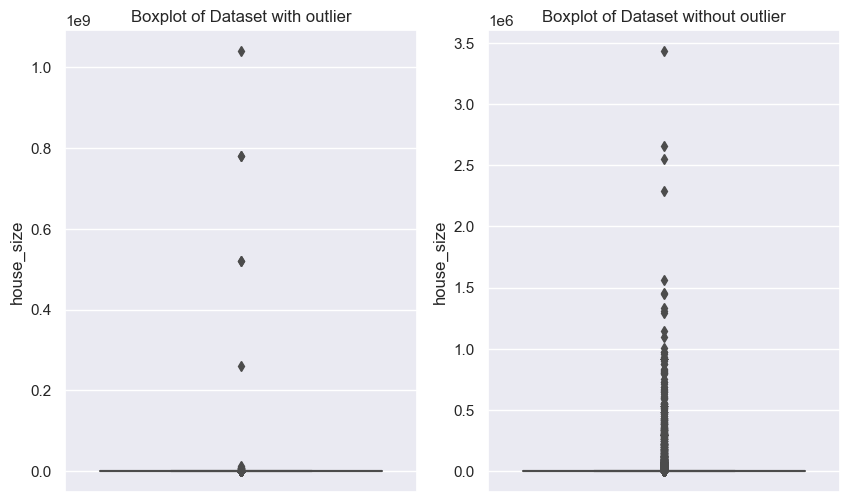

In [31]:
import matplotlib.pyplot as plt

# Create a figure with two subplots (1 row, 2 columns)
fig, axes = plt.subplots(1, 2, figsize=(10, 6))
# First boxplot from df_concat
sns.boxplot(y='house_size', data=df_concat, ax=axes[0])
axes[0].set_title('Boxplot of Dataset with outlier')

# Second boxplot from df_trim
sns.boxplot(y='house_size', data=df_trim, ax=axes[1])
axes[1].set_title('Boxplot of Dataset without outlier')

In [32]:
df_trim.head()

,bath,bed,acre_lot,house_size,status,street,city,state,zip_code,price
0,2.0,3.0,0.12,920.0,for_sale,1962661.0,Adjuntas,Puerto Rico,601.0,105000.0
1,2.0,4.0,0.08,1527.0,for_sale,1902874.0,Adjuntas,Puerto Rico,601.0,80000.0
2,1.0,2.0,0.15,748.0,for_sale,1404990.0,Juana Diaz,Puerto Rico,795.0,67000.0
3,2.0,4.0,0.10,1800.0,for_sale,1947675.0,Ponce,Puerto Rico,731.0,145000.0
4,2.0,6.0,0.05,2160.0,for_sale,331151.0,Mayaguez,Puerto Rico,680.0,65000.0


- All 4 quantitative columns were trimmed for their outliers. Later, this data can be separately used for house price forecasting using various ML models. 

## 2-1B Capping method
- Another way of dealing with outliers is by capping the outliers with upper and lower limits of each specific column
- Change the values of outliers to the upper_limit and lower_limit values instead of deleting them

In [33]:
df_cap = df_concat.copy()

In [34]:
# replace outliers with upper and lower limits
df_cap.loc[df_cap['bed'] < lower_limit_b, 'bed'] = lower_limit_b
df_cap.loc[df_cap['bed'] > upper_limit_b, 'bed'] = upper_limit_b

In [35]:
len(df_cap)

2212488

In [36]:
# replace outliers with upper and lower limits
df_cap.loc[df_cap['bath'] < lower_limit_ba, 'bath'] = lower_limit_ba
df_cap.loc[df_cap['bath'] > upper_limit_ba, 'bath'] = upper_limit_ba

In [37]:
len(df_cap)

2212488

In [38]:
# replace outliers with upper and lower limits
df_cap.loc[df_cap['acre_lot'] < lower_limit_acre_lot, 'acre_lot'] = lower_limit_acre_lot
df_cap.loc[df_cap['acre_lot'] > upper_limit_acre_lot, 'acre_lot'] = upper_limit_acre_lot

In [39]:
len(df_cap)

2212488

In [40]:
# replace outliers with upper and lower limits
df_cap.loc[df_cap['house_size'] < lower_limit_house_size, 'house_size'] = lower_limit_house_size
df_cap.loc[df_cap['house_size'] > upper_limit_house_size, 'house_size'] = upper_limit_house_size

In [41]:
len(df_cap)

2212488

In [42]:
df_cap.head()

,bath,bed,acre_lot,house_size,status,street,city,state,zip_code,price
0,2.0,3.0,0.12,920.0,for_sale,1962661.0,Adjuntas,Puerto Rico,601.0,105000.0
1,2.0,4.0,0.08,1527.0,for_sale,1902874.0,Adjuntas,Puerto Rico,601.0,80000.0
2,1.0,2.0,0.15,748.0,for_sale,1404990.0,Juana Diaz,Puerto Rico,795.0,67000.0
3,2.0,4.0,0.10,1800.0,for_sale,1947675.0,Ponce,Puerto Rico,731.0,145000.0
4,2.0,6.0,0.05,2160.0,for_sale,331151.0,Mayaguez,Puerto Rico,680.0,65000.0


- Now, let's use another method for dealing with outliers: IQR method 

## 2-2  IQR Method
- The Interquartile Range (IQR) method is another effective technique for detecting and removing outliers. It is based on the spread of the middle 50% of the data. The IQR is calculated as the difference between the third quartile (Q3) and the first quartile (Q1). 
- Data points that fall below Q1−1.5×IQR or above Q3+1.5×IQR are considered outliers.
- Steps:

    - Calculate Q1 (25th percentile) and Q3 (75th percentile).
    - Calculate the IQR: IQR=Q3−Q1.
    - Determine the outlier boundaries:
        Lower Bound = Q1−1.5×IQR
        Upper Bound = Q3+1.5×IQR
    Remove data points outside these boundaries.

In [43]:
df_iqr = df_concat.copy()

In [44]:
# Finidng upper and lower limits of outliers using IQR method:

q1_b = df_iqr['bed'].quantile(0.25)
q3_b = df_iqr['bed'].quantile(0.75)
iqr_b = q3_b - q1_b

print(q1_b, q3_b, iqr_b)

upper_b = q3_b + (1.5 * iqr_b)
lower_b = q1_b - (1.5 * iqr_b)
print(lower_b, upper_b)

3.0 4.0 1.0
1.5 5.5


In [45]:
# Finidng upper and lower limits of outliers using IQR method:
q1_ba = df_iqr['bath'].quantile(0.25)
q3_ba = df_iqr['bath'].quantile(0.75)
iqr_ba = q3_ba - q1_ba

print(q1_ba, q3_ba, iqr_ba)

upper_ba = q3_ba + (1.5 * iqr_ba)
lower_ba = q1_ba - (1.5 * iqr_ba)
print(lower_ba, upper_ba)

2.0 3.0 1.0
0.5 4.5


In [46]:
# Finidng upper and lower limits of outliers using IQR method:
q1_acre_lot = df_iqr['acre_lot'].quantile(0.25)
q3_acre_lot = df_iqr['acre_lot'].quantile(0.75)
iqr_acre_lot = q3_acre_lot - q1_acre_lot

print(q1_acre_lot, q3_acre_lot, iqr_acre_lot)

upper_acre_lot = q3_acre_lot + (1.5 * iqr_acre_lot)
lower_acre_lot = q1_acre_lot - (1.5 * iqr_acre_lot)
print(lower_acre_lot, upper_acre_lot)

0.15 0.92 0.77
-1.0050000000000001 2.075


In [47]:
# Finidng upper and lower limits of outliers using IQR method:
q1_house_size = df_iqr['house_size'].quantile(0.25)
q3_house_size = df_iqr['house_size'].quantile(0.75)
iqr_house_size = q3_house_size - q1_house_size

print(q1_house_size, q3_house_size, iqr_house_size)

upper_house_size = q3_house_size + (1.5 * iqr_house_size)
lower_house_size = q1_house_size - (1.5 * iqr_house_size)
print(lower_house_size, upper_house_size)

1348.142857142857 2445.4 1097.257142857143
-297.7428571428575 4091.2857142857147


## 2-2A Trimming

In [48]:
df_trim_iqr = df_iqr.loc[(df_iqr['bed']>lower_b) & (df_iqr['bed']<upper_b)]
print("new_df: ", len(df_trim_iqr))
print("old_df: ", len(df_iqr))

new_df:  2070887
old_df:  2212488


In [49]:
df_trim_iqr = df_iqr.loc[(df_iqr['bath']>lower_ba) & (df_iqr['bath']<upper_ba)]
print("new_df: ", len(df_trim_iqr))
print("old_df: ", len(df_iqr))

new_df:  2107383
old_df:  2212488


In [50]:
df_trim_iqr = df_iqr.loc[(df_iqr['acre_lot']>lower_acre_lot) & (df_iqr['acre_lot']<upper_acre_lot)]
print("new_df: ", len(df_trim_iqr))
print("old_df: ", len(df_iqr))

new_df:  1870817
old_df:  2212488


In [51]:
df_trim_iqr = df_iqr.loc[(df_iqr['house_size']>lower_house_size) & (df_iqr['house_size']<upper_house_size)]
print("new_df: ", len(df_trim_iqr))
print("old_df: ", len(df_iqr))

new_df:  2103818
old_df:  2212488


<Axes: >

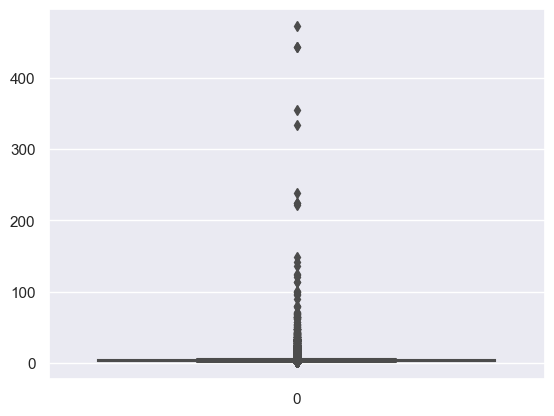

In [52]:
sns.boxplot(df_trim_iqr['bed'])

<Axes: >

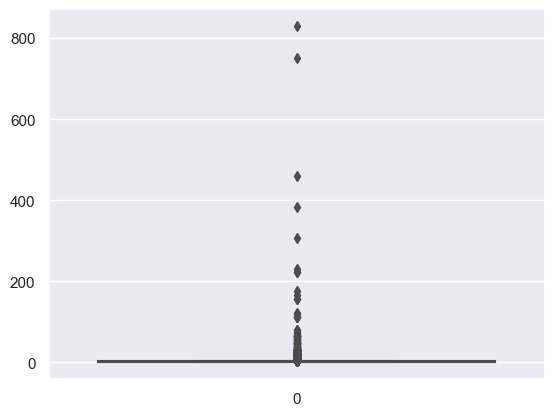

In [53]:
sns.boxplot(df_trim_iqr['bath'])

<Axes: >

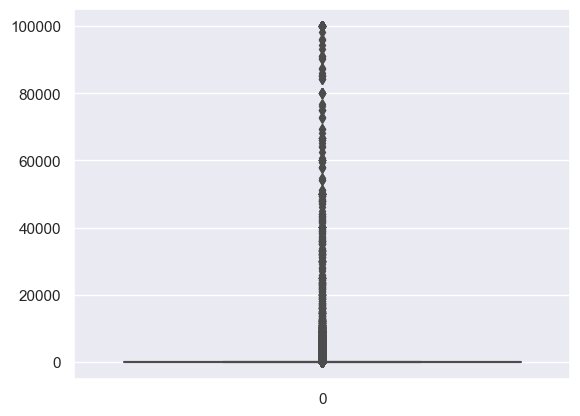

In [54]:
sns.boxplot(df_trim_iqr['acre_lot'])

<Axes: >

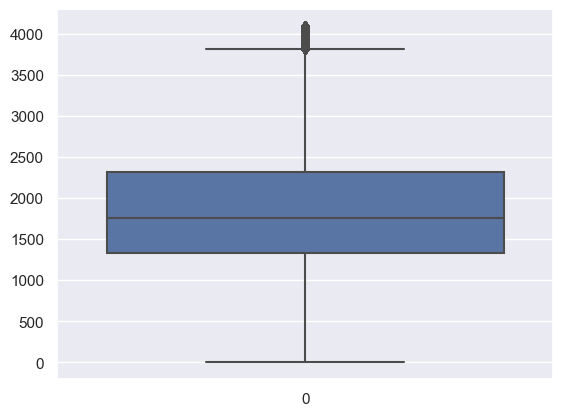

In [55]:
sns.boxplot(df_trim_iqr['house_size'])

## 2-2B Capping

In [56]:
df_cap_iqr = df_iqr.copy()

In [57]:
# replace outliers with upper and lower limits
df_cap_iqr.loc[df_cap_iqr['bed'] < lower_b, 'bed'] = lower_b
df_cap_iqr.loc[df_cap_iqr['bed'] > upper_b, 'bed'] = upper_b

In [58]:
# replace outliers with upper and lower limits
df_cap_iqr.loc[df_cap_iqr['bath'] < lower_ba, 'bath'] = lower_ba
df_cap_iqr.loc[df_cap_iqr['bath'] > upper_ba, 'bath'] = upper_ba

In [59]:
# replace outliers with upper and lower limits
df_cap_iqr.loc[df_cap_iqr['acre_lot'] < lower_acre_lot, 'acre_lot'] = lower_acre_lot
df_cap_iqr.loc[df_cap_iqr['acre_lot'] > upper_acre_lot, 'acre_lot'] = upper_acre_lot

In [60]:
# replace outliers with upper and lower limits
df_cap_iqr.loc[df_cap_iqr['house_size'] < lower_house_size, 'house_size'] = lower_house_size
df_cap_iqr.loc[df_cap_iqr['house_size'] > upper_house_size, 'house_size'] = upper_house_size

In [61]:
df_cap_iqr.head()

,bath,bed,acre_lot,house_size,status,street,city,state,zip_code,price
0,2.0,3.0,0.12,920.0,for_sale,1962661.0,Adjuntas,Puerto Rico,601.0,105000.0
1,2.0,4.0,0.08,1527.0,for_sale,1902874.0,Adjuntas,Puerto Rico,601.0,80000.0
2,1.0,2.0,0.15,748.0,for_sale,1404990.0,Juana Diaz,Puerto Rico,795.0,67000.0
3,2.0,4.0,0.10,1800.0,for_sale,1947675.0,Ponce,Puerto Rico,731.0,145000.0
4,2.0,5.5,0.05,2160.0,for_sale,331151.0,Mayaguez,Puerto Rico,680.0,65000.0


In [62]:
df_cap_iqr.head()

,bath,bed,acre_lot,house_size,status,street,city,state,zip_code,price
0,2.0,3.0,0.12,920.0,for_sale,1962661.0,Adjuntas,Puerto Rico,601.0,105000.0
1,2.0,4.0,0.08,1527.0,for_sale,1902874.0,Adjuntas,Puerto Rico,601.0,80000.0
2,1.0,2.0,0.15,748.0,for_sale,1404990.0,Juana Diaz,Puerto Rico,795.0,67000.0
3,2.0,4.0,0.10,1800.0,for_sale,1947675.0,Ponce,Puerto Rico,731.0,145000.0
4,2.0,5.5,0.05,2160.0,for_sale,331151.0,Mayaguez,Puerto Rico,680.0,65000.0


- We have 4 different datasets to use for feature selection and forecasting

# 3. Categorical Encoding

- Ensure to drop one of the dummy variables to avoid multicollinearity. In pandas' get_dummies() function, you can use drop_first=True to automatically drop the first category.
- We will use df_cap dataframe obtained from 2-1B Capping method

In [63]:
df_cat = df_cap.copy()

- There are some cities which we only have 1 row of data available for them. We can put them in a category of "other_cities" to reduce down the number f dummy variables.

In [64]:
df_cat

,bath,bed,acre_lot,house_size,status,street,city,state,zip_code,price
0,2.0,3.0,0.12,920.0,for_sale,1962661.0,Adjuntas,Puerto Rico,601.0,105000.0
1,2.0,4.0,0.08,1527.0,for_sale,1902874.0,Adjuntas,Puerto Rico,601.0,80000.0
2,1.0,2.0,0.15,748.0,for_sale,1404990.0,Juana Diaz,Puerto Rico,795.0,67000.0
3,2.0,4.0,0.10,1800.0,for_sale,1947675.0,Ponce,Puerto Rico,731.0,145000.0
4,2.0,6.0,0.05,2160.0,for_sale,331151.0,Mayaguez,Puerto Rico,680.0,65000.0
...,...,...,...,...,...,...,...,...,...,...
2226377,2.0,4.0,0.33,3600.0,sold,353094.0,Richland,Washington,99354.0,359900.0
2226378,2.0,3.0,0.10,1616.0,sold,1062149.0,Richland,Washington,99354.0,350000.0
2226379,3.0,6.0,0.50,3200.0,sold,405677.0,Richland,Washington,99354.0,440000.0
2226380,1.0,2.0,0.09,933.0,sold,761379.0,Richland,Washington,99354.0,179900.0


## Status Column Get Dummies

In [65]:
df_cat['status'].unique()

array(['for_sale', 'ready_to_build', 'sold'], dtype=object)

In [66]:
status_dummies = pd.get_dummies(df_cat['status']).astype(int)

In [67]:
status_dummies.drop('sold', axis=1, inplace=True)

In [68]:
status_dummies

,for_sale,ready_to_build
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0
...,...,...
2226377,0,0
2226378,0,0
2226379,0,0
2226380,0,0


## State Column Get Dummies

In [69]:
len(df_cat['state'].unique())

55

- There are great number of cities, zip_codes and streets in this dataframe. So I will drop the column and only consider the state instead for one-hot endocing.

In [70]:
# Let's get dummies of state column and remove the other lcation related columns such as zip_code, city, street
state_dummies = pd.get_dummies(df_cat['state'], drop_first=True).astype(int)
state_dummies

,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,District of Columbia,Florida,Georgia,...,Tennessee,Texas,Utah,Vermont,Virgin Islands,Virginia,Washington,West Virginia,Wisconsin,Wyoming
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2226377,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2226378,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2226379,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2226380,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [71]:
# Now, we will concatenate the dummies into our main dataframe
df_cat = pd.concat([df_cat, status_dummies, state_dummies], axis=1)

In [72]:
df_city = df_cat[['street', 'city', 'zip_code', 'state', 'status']]

In [73]:
df_cat.drop(['street', 'city', 'zip_code', 'state', 'status'], axis=1, inplace=True)

In [74]:
df_cat

,bath,bed,acre_lot,house_size,price,for_sale,ready_to_build,Alaska,Arizona,Arkansas,...,Tennessee,Texas,Utah,Vermont,Virgin Islands,Virginia,Washington,West Virginia,Wisconsin,Wyoming
0,2.0,3.0,0.12,920.0,105000.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2.0,4.0,0.08,1527.0,80000.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1.0,2.0,0.15,748.0,67000.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2.0,4.0,0.10,1800.0,145000.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2.0,6.0,0.05,2160.0,65000.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2226377,2.0,4.0,0.33,3600.0,359900.0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2226378,2.0,3.0,0.10,1616.0,350000.0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2226379,3.0,6.0,0.50,3200.0,440000.0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2226380,1.0,2.0,0.09,933.0,179900.0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


# Train/Test Split

In [75]:
from sklearn.model_selection import train_test_split
from fast_ml.model_development import train_valid_test_split


x_train, y_train, x_val, y_val, x_test, y_test = train_valid_test_split(df_cat, 
                                                                        target='price',
                                                                        train_size=0.8, 
                                                                        valid_size= 0.1, 
                                                                        test_size=0.1, random_state=1)

# 4. Train DataFrame/Correlation

In [76]:
train_data = x_train.join(y_train)
train_data

,bath,bed,acre_lot,house_size,for_sale,ready_to_build,Alaska,Arizona,Arkansas,California,...,Texas,Utah,Vermont,Virgin Islands,Virginia,Washington,West Virginia,Wisconsin,Wyoming,price
1822437,2.000000,3.000000,0.110000,1400.000000,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,155000.0
2110912,2.000000,3.000000,0.720000,1755.000000,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,769000.0
1664444,2.000000,3.000000,2.550000,1635.000000,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,99000.0
1197301,2.000000,3.000000,0.150000,1812.000000,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,500000.0
1540507,2.000000,3.000000,0.040000,1310.000000,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,740000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73691,2.000000,3.000000,4.060000,2428.666667,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,550000.0
842505,5.130435,5.565217,0.270000,3382.869565,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,69000.0
494508,2.000000,2.000000,0.152083,1000.000000,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,145000.0
495007,2.000000,2.000000,0.316667,1049.000000,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,179999.0


In [77]:
train_corr = train_data[['bath', 'bed', 'acre_lot', 'house_size', 'price']]
train_corr.corr()

,bath,bed,acre_lot,house_size,price
bath,1.000000,0.621952,0.003492,0.075157,0.221502
bed,0.621952,1.000000,0.005702,0.062922,0.132260
acre_lot,0.003492,0.005702,1.000000,0.021173,0.084595
house_size,0.075157,0.062922,0.021173,1.000000,0.028730
price,0.221502,0.132260,0.084595,0.028730,1.000000


<Axes: >

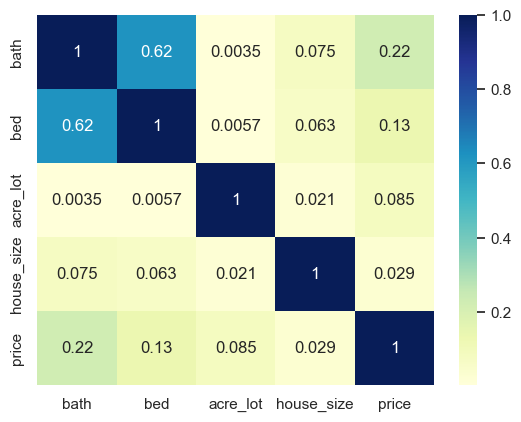

In [78]:
sns.heatmap(train_corr.corr(), annot=True, cmap='YlGnBu')# Correlations are not high enough to rduce the dimensionality using Principle Component Analysis (PCA).

- There is a positive correlation between house price and number of bed and bath.
- There is also slight positive correlation between price and acre_lot and house_size. 
- There is also a high positive correlation between number of beds and baths.Houses with higher number of beds, also have high number of baths.

# 4. Data Scaling

## 4-1 StandardScaler

In [79]:
# x_train
# Columns of "bath, bed, acre_lot, house_size" will be scaled with different techniques

In [80]:
from sklearn.preprocessing import StandardScaler, Normalizer, MinMaxScaler
import matplotlib.pyplot as plt

x_train_scale = x_train[['bath', 'bed', 'acre_lot', 'house_size']].to_numpy()

scaler = StandardScaler().fit(x_train_scale)
x_train_scaled = scaler.transform(x_train_scale)

#plt.hist(x_train_scaled[:, 0]) # for the first comlumn : "bath"

In [81]:
# Create a new DataFrame with scaled features
x_train_scaled_df = pd.DataFrame(x_train_scaled, columns=['bath', 'bed', 'acre_lot', 'house_size'], index=x_train.index)
x_train_scaled_df.head()

,bath,bed,acre_lot,house_size
1822437,-0.453399,-0.246659,-0.088688,-0.067330
2110912,-0.453399,-0.246659,-0.079367,-0.035903
1664444,-0.453399,-0.246659,-0.051402,-0.046526
1197301,-0.453399,-0.246659,-0.088077,-0.030857
1540507,-0.453399,-0.246659,-0.089758,-0.075298


In [82]:
x_train.drop(['bath', 'bed', 'acre_lot', 'house_size'], axis=1, inplace=True)
# let's remove the columns which are not scaled and add the scaled values later

In [83]:
scaled_x_train_full_df = pd.concat([x_train_scaled_df, x_train], axis=1)
scaled_x_train_full_df.head()

,bath,bed,acre_lot,house_size,for_sale,ready_to_build,Alaska,Arizona,Arkansas,California,...,Tennessee,Texas,Utah,Vermont,Virgin Islands,Virginia,Washington,West Virginia,Wisconsin,Wyoming
1822437,-0.453399,-0.246659,-0.088688,-0.067330,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2110912,-0.453399,-0.246659,-0.079367,-0.035903,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1664444,-0.453399,-0.246659,-0.051402,-0.046526,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1197301,-0.453399,-0.246659,-0.088077,-0.030857,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1540507,-0.453399,-0.246659,-0.089758,-0.075298,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [84]:
x_val_scale = x_val[['bath', 'bed', 'acre_lot', 'house_size']].to_numpy()
x_val_scale

scaler = StandardScaler().fit(x_val_scale)
x_val_scaled = scaler.transform(x_val_scale)

#plt.hist(x_test_scaled[:, 0])

In [85]:
# Create a new DataFrame with scaled features
x_val_scaled_df = pd.DataFrame(x_val_scaled, columns=['bath', 'bed', 'acre_lot', 'house_size'], index=x_val.index)
x_val_scaled_df.head()

,bath,bed,acre_lot,house_size
1198133,-0.453161,0.678774,-0.087833,-0.022515
84554,-1.370046,0.678774,-0.089856,-0.070366
1830183,-0.453161,-1.175566,-0.072742,-0.079475
990771,1.297256,1.015927,0.008629,0.093003
691931,2.297494,1.605944,-0.085188,0.080209


In [86]:
x_val.drop(['bath', 'bed', 'acre_lot', 'house_size'], axis=1, inplace=True)

In [87]:
scaled_x_val_full_df = pd.concat([x_val_scaled_df, x_val], axis=1)
scaled_x_val_full_df.head()

,bath,bed,acre_lot,house_size,for_sale,ready_to_build,Alaska,Arizona,Arkansas,California,...,Tennessee,Texas,Utah,Vermont,Virgin Islands,Virginia,Washington,West Virginia,Wisconsin,Wyoming
1198133,-0.453161,0.678774,-0.087833,-0.022515,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
84554,-1.370046,0.678774,-0.089856,-0.070366,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1830183,-0.453161,-1.175566,-0.072742,-0.079475,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
990771,1.297256,1.015927,0.008629,0.093003,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
691931,2.297494,1.605944,-0.085188,0.080209,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [88]:
x_test_scale = x_test[['bath', 'bed', 'acre_lot', 'house_size']].to_numpy()
x_test_scale

scaler = StandardScaler().fit(x_test_scale)
x_test_scaled = scaler.transform(x_test_scale)

#plt.hist(x_test_scaled[:, 0])

In [89]:
# Create a new DataFrame with scaled features
x_test_scaled_df = pd.DataFrame(x_test_scaled, columns=['bath', 'bed', 'acre_lot', 'house_size'], index=x_test.index)
x_test_scaled_df.head()

,bath,bed,acre_lot,house_size
673320,2.539418,-0.244654,-0.057754,0.006740
1347803,-0.452976,-0.244654,-0.088955,-0.067474
383084,0.336227,-0.376337,-0.068631,0.036090
472310,-0.452976,-0.244654,-0.088638,-0.055316
980497,4.511051,4.461722,-0.084033,31.794026


In [90]:
x_test.drop(['bath', 'bed', 'acre_lot', 'house_size'], axis=1, inplace=True)

In [91]:
scaled_x_test_full_df = pd.concat([x_test_scaled_df, x_test], axis=1)
scaled_x_test_full_df.head()

,bath,bed,acre_lot,house_size,for_sale,ready_to_build,Alaska,Arizona,Arkansas,California,...,Tennessee,Texas,Utah,Vermont,Virgin Islands,Virginia,Washington,West Virginia,Wisconsin,Wyoming
673320,2.539418,-0.244654,-0.057754,0.006740,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1347803,-0.452976,-0.244654,-0.088955,-0.067474,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
383084,0.336227,-0.376337,-0.068631,0.036090,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
472310,-0.452976,-0.244654,-0.088638,-0.055316,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
980497,4.511051,4.461722,-0.084033,31.794026,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [92]:
y_test_df = pd.DataFrame(y_test, columns=['price'])
y_val_df = pd.DataFrame(y_val, columns=['price'])
y_train_df = pd.DataFrame(y_train, columns=['price'])

## 4-2 Normalizer

In [93]:
# Perform train-val-test split

x_train, y_train, x_val, y_val, x_test, y_test = train_valid_test_split(df_cat, 
                                                                        target='price',
                                                                        train_size=0.8, 
                                                                        valid_size= 0.1, 
                                                                        test_size=0.1, random_state=1)

In [94]:
x_train_norm = x_train[['bath', 'bed', 'acre_lot', 'house_size']].to_numpy()
x_train_norm

normalizer = Normalizer().fit(x_train_norm)
x_train_normalized = normalizer.transform(x_train_norm)

#plt.hist(x_test_scaled[:, 0])

In [95]:
# Create a new DataFrame with scaled features
x_train_normalized_df = pd.DataFrame(x_train_normalized, columns=['bath', 'bed', 'acre_lot', 'house_size'], index=x_train.index)
x_train_normalized_df.head()

,bath,bed,acre_lot,house_size
1822437,0.001429,0.002143,0.000079,0.999997
2110912,0.001140,0.001709,0.000410,0.999998
1664444,0.001223,0.001835,0.001560,0.999996
1197301,0.001104,0.001656,0.000083,0.999998
1540507,0.001527,0.002290,0.000031,0.999996


In [96]:
x_train.drop(['bath', 'bed', 'acre_lot', 'house_size'], axis=1, inplace=True)

In [97]:
normalized_x_train_full_df = pd.concat([x_train_normalized_df, x_train], axis=1)
normalized_x_train_full_df.head()

,bath,bed,acre_lot,house_size,for_sale,ready_to_build,Alaska,Arizona,Arkansas,California,...,Tennessee,Texas,Utah,Vermont,Virgin Islands,Virginia,Washington,West Virginia,Wisconsin,Wyoming
1822437,0.001429,0.002143,0.000079,0.999997,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2110912,0.001140,0.001709,0.000410,0.999998,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1664444,0.001223,0.001835,0.001560,0.999996,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1197301,0.001104,0.001656,0.000083,0.999998,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1540507,0.001527,0.002290,0.000031,0.999996,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [98]:
x_val_norm = x_val[['bath', 'bed', 'acre_lot', 'house_size']].to_numpy()
x_val_norm

normalizer = Normalizer().fit(x_val_norm)
x_val_normalized = normalizer.transform(x_val_norm)

#plt.hist(x_test_scaled[:, 0])

In [99]:
# Create a new DataFrame with scaled features
x_val_normalized_df = pd.DataFrame(x_val_normalized, columns=['bath', 'bed', 'acre_lot', 'house_size'], index=x_val.index)
x_val_normalized_df.head()

,bath,bed,acre_lot,house_size
1198133,0.001034,0.002068,0.000088,0.999997
84554,0.000668,0.002670,0.000027,0.999996
1830183,0.001413,0.001413,0.000806,0.999998
990771,0.001309,0.001461,0.002133,0.999996
691931,0.001742,0.001742,0.000118,0.999997


In [100]:
x_val.drop(['bath', 'bed', 'acre_lot', 'house_size'], axis=1, inplace=True)

In [101]:
normalized_x_val_full_df = pd.concat([x_val_normalized_df, x_val], axis=1)
normalized_x_val_full_df.head()

,bath,bed,acre_lot,house_size,for_sale,ready_to_build,Alaska,Arizona,Arkansas,California,...,Tennessee,Texas,Utah,Vermont,Virgin Islands,Virginia,Washington,West Virginia,Wisconsin,Wyoming
1198133,0.001034,0.002068,0.000088,0.999997,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
84554,0.000668,0.002670,0.000027,0.999996,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1830183,0.001413,0.001413,0.000806,0.999998,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
990771,0.001309,0.001461,0.002133,0.999996,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
691931,0.001742,0.001742,0.000118,0.999997,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [102]:
x_test_norm = x_test[['bath', 'bed', 'acre_lot', 'house_size']].to_numpy()
x_test_norm

normalizer = StandardScaler().fit(x_test_norm)
x_test_normalized = scaler.transform(x_test_norm)

#plt.hist(x_test_scaled[:, 0])

In [103]:
# Create a new DataFrame with scaled features
x_test_normalized_df = pd.DataFrame(x_test_normalized, columns=['bath', 'bed', 'acre_lot', 'house_size'], index=x_test.index)
x_test_normalized_df.head()

,bath,bed,acre_lot,house_size
673320,2.539418,-0.244654,-0.057754,0.006740
1347803,-0.452976,-0.244654,-0.088955,-0.067474
383084,0.336227,-0.376337,-0.068631,0.036090
472310,-0.452976,-0.244654,-0.088638,-0.055316
980497,4.511051,4.461722,-0.084033,31.794026


In [104]:
x_test.drop(['bath', 'bed', 'acre_lot', 'house_size'], axis=1, inplace=True)

In [105]:
normalized_x_test_full_df = pd.concat([x_test_normalized_df, x_test], axis=1)
normalized_x_test_full_df.head()

,bath,bed,acre_lot,house_size,for_sale,ready_to_build,Alaska,Arizona,Arkansas,California,...,Tennessee,Texas,Utah,Vermont,Virgin Islands,Virginia,Washington,West Virginia,Wisconsin,Wyoming
673320,2.539418,-0.244654,-0.057754,0.006740,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1347803,-0.452976,-0.244654,-0.088955,-0.067474,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
383084,0.336227,-0.376337,-0.068631,0.036090,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
472310,-0.452976,-0.244654,-0.088638,-0.055316,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
980497,4.511051,4.461722,-0.084033,31.794026,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [106]:
y_test_df = pd.DataFrame(y_test, columns=['price'])
y_val_df = pd.DataFrame(y_val, columns=['price'])
y_train_df = pd.DataFrame(y_train, columns=['price'])

## 4-3 MinMaxScaler

In [107]:
# Perform train-val-test split

x_train, y_train, x_val, y_val, x_test, y_test = train_valid_test_split(df_cat, 
                                                                        target='price',
                                                                        train_size=0.8, 
                                                                        valid_size= 0.1, 
                                                                        test_size=0.1, random_state=1)

In [108]:
x_train_scale = x_train[['bath', 'bed', 'acre_lot', 'house_size']].to_numpy()

scaler = StandardScaler().fit(x_train_scale)
x_train_scaled = scaler.transform(x_train_scale)

In [109]:
# Create a new DataFrame with scaled features
x_train_normalized_df = pd.DataFrame(x_train_normalized, columns=['bath', 'bed', 'acre_lot', 'house_size'], index=x_train.index)
x_train_normalized_df.head()

,bath,bed,acre_lot,house_size
1822437,0.001429,0.002143,0.000079,0.999997
2110912,0.001140,0.001709,0.000410,0.999998
1664444,0.001223,0.001835,0.001560,0.999996
1197301,0.001104,0.001656,0.000083,0.999998
1540507,0.001527,0.002290,0.000031,0.999996


In [110]:
x_train.drop(['bath', 'bed', 'acre_lot', 'house_size'], axis=1, inplace=True)

In [111]:
normalized_x_test_full_df = pd.concat([x_test_normalized_df, x_test], axis=1)
normalized_x_test_full_df.head()

,bath,bed,acre_lot,house_size,bath,bed,acre_lot,house_size,for_sale,ready_to_build,...,Tennessee,Texas,Utah,Vermont,Virgin Islands,Virginia,Washington,West Virginia,Wisconsin,Wyoming
673320,2.539418,-0.244654,-0.057754,0.006740,5.250000,3.000000,2.075,2310.000000,0,1,...,0,0,0,0,0,0,0,0,0,0
1347803,-0.452976,-0.244654,-0.088955,-0.067474,2.000000,3.000000,0.110,1138.000000,1,0,...,0,0,0,0,0,0,0,0,0,0
383084,0.336227,-0.376337,-0.068631,0.036090,2.857143,2.857143,1.390,2773.500000,1,0,...,0,0,0,0,0,0,0,0,0,0
472310,-0.452976,-0.244654,-0.088638,-0.055316,2.000000,3.000000,0.130,1330.000000,1,0,...,0,0,0,0,0,0,0,0,0,0
980497,4.511051,4.461722,-0.084033,31.794026,7.391364,8.105721,0.420,504297.391304,1,0,...,0,0,0,0,0,0,0,0,0,0


In [112]:
y_test_df = pd.DataFrame(y_test, columns=['price'])
y_val_df = pd.DataFrame(y_val, columns=['price'])
y_train_df = pd.DataFrame(y_train, columns=['price'])

# Baseline Model for Comparison

In [113]:
from sklearn.metrics import mean_absolute_error as mae

average_house_price = y_train_df['price'].mean()
base_line_model_train_prediction = [average_house_price] * len(y_train_df)

In [114]:
average_house_price = y_val_df['price'].mean()
base_line_model_val_prediction = [average_house_price] * len(y_val_df)

In [115]:
mae(base_line_model_train_prediction,  y_train_df)

409339.224729224

In [116]:
mae(base_line_model_val_prediction,  y_val_df)

406663.5766480172

# Linear Regression

In [117]:
scaled_x_train_np = scaled_x_train_full_df.to_numpy()
y_train_np = y_train_df.to_numpy()

scaled_x_val_np = scaled_x_val_full_df.to_numpy()
y_val_np = y_val_df.to_numpy()

scaled_x_test_np = scaled_x_test_full_df.to_numpy()
y_test_np = y_test_df.to_numpy()

In [118]:
from sklearn.linear_model import LinearRegression

# Create and fit the model
model = LinearRegression()
model.fit(scaled_x_train_np, y_train_np)

# Make predictions
predictions = model.predict(scaled_x_train_np)

mae(predictions,y_train_np)  

369805.69158815657

In [119]:
# Create and fit the model
model = LinearRegression()
model.fit(scaled_x_val_np, y_val_np)

# Make predictions
predictions = model.predict(scaled_x_val_np)

mae(predictions,y_val_np)  

368175.9243932193

# Gradient Boosting

In [120]:
from sklearn.ensemble import GradientBoostingRegressor

# Create and fit the model
gbr = GradientBoostingRegressor(n_estimators=10)
gbr.fit(scaled_x_train_np, y_train_np)

# Make predictions
predictions = gbr.predict(scaled_x_train_np)

mae(predictions, y_train_np) 


345029.31718013843

In [121]:
# Make predictions
predictions = gbr.predict(scaled_x_val_np)

mae(predictions, y_val_np) 

344286.55152862426

# Neural Networks

In [122]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint#will save the best model with lowest error
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam

# 1. Simple Neural Network 

In [123]:
scaled_x_train_np.shape[1]

60

In [124]:
simple_nn = Sequential()
simple_nn.add(InputLayer(scaled_x_train_np.shape[1],))
simple_nn.add(Dense(2, 'relu'))
simple_nn.add(Dense(1, 'linear'))

optimizer = Adam(learning_rate=0.1)
compiler = ModelCheckpoint('models', save_best_only=True)
simple_nn.compile(optimizer=optimizer, loss='mse', metrics=[RootMeanSquaredError()])
simple_nn.fit(x=scaled_x_train_np, y=y_train_np, validation_data=(scaled_x_val_np, y_val_np), callbacks=[compiler], epochs=10)



Epoch 1/10

55282/55313 [============================>.] - ETA: 0s - loss: 2551519117312.0000 - root_mean_squared_error: 1597347.5000INFO:tensorflow:Assets written to: models\assets


INFO:tensorflow:Assets written to: models\assets


55313/55313 [==============================] - 50s 884us/step - loss: 2552632967168.0000 - root_mean_squared_error: 1597696.1250 - val_loss: 1368844533760.0000 - val_root_mean_squared_error: 1169976.2500
Epoch 2/10
55291/55313 [============================>.] - ETA: 0s - loss: 2481190338560.0000 - root_mean_squared_error: 1575179.5000INFO:tensorflow:Assets written to: models\assets


INFO:tensorflow:Assets written to: models\assets


55313/55313 [==============================] - 51s 923us/step - loss: 2480492249088.0000 - root_mean_squared_error: 1574957.8750 - val_loss: 1326585085952.0000 - val_root_mean_squared_error: 1151774.7500
Epoch 3/10
55283/55313 [============================>.] - ETA: 0s - loss: 2448308830208.0000 - root_mean_squared_error: 1564707.2500INFO:tensorflow:Assets written to: models\assets


INFO:tensorflow:Assets written to: models\assets


55313/55313 [==============================] - 53s 959us/step - loss: 2447858466816.0000 - root_mean_squared_error: 1564563.3750 - val_loss: 1301899116544.0000 - val_root_mean_squared_error: 1141008.0000
Epoch 4/10
55258/55313 [============================>.] - ETA: 0s - loss: 2431801360384.0000 - root_mean_squared_error: 1559423.3750INFO:tensorflow:Assets written to: models\assets


INFO:tensorflow:Assets written to: models\assets


55313/55313 [==============================] - 52s 938us/step - loss: 2429988110336.0000 - root_mean_squared_error: 1558841.8750 - val_loss: 1289494855680.0000 - val_root_mean_squared_error: 1135559.2500
Epoch 5/10
55268/55313 [============================>.] - ETA: 0s - loss: 2421573812224.0000 - root_mean_squared_error: 1556140.6250INFO:tensorflow:Assets written to: models\assets


INFO:tensorflow:Assets written to: models\assets


55313/55313 [==============================] - 48s 859us/step - loss: 2420035289088.0000 - root_mean_squared_error: 1555646.2500 - val_loss: 1280789970944.0000 - val_root_mean_squared_error: 1131719.8750
Epoch 6/10
55247/55313 [============================>.] - ETA: 0s - loss: 2414448476160.0000 - root_mean_squared_error: 1553849.6250INFO:tensorflow:Assets written to: models\assets


INFO:tensorflow:Assets written to: models\assets


55313/55313 [==============================] - 48s 860us/step - loss: 2413620887552.0000 - root_mean_squared_error: 1553583.2500 - val_loss: 1276761210880.0000 - val_root_mean_squared_error: 1129938.6250
Epoch 7/10
55275/55313 [============================>.] - ETA: 0s - loss: 2410510811136.0000 - root_mean_squared_error: 1552582.0000INFO:tensorflow:Assets written to: models\assets


INFO:tensorflow:Assets written to: models\assets


55313/55313 [==============================] - 47s 849us/step - loss: 2409156837376.0000 - root_mean_squared_error: 1552145.8750 - val_loss: 1273096306688.0000 - val_root_mean_squared_error: 1128315.7500
Epoch 8/10
55275/55313 [============================>.] - ETA: 0s - loss: 2408720105472.0000 - root_mean_squared_error: 1552005.2500INFO:tensorflow:Assets written to: models\assets


INFO:tensorflow:Assets written to: models\assets


55313/55313 [==============================] - 47s 849us/step - loss: 2407318683648.0000 - root_mean_squared_error: 1551553.6250 - val_loss: 1270805037056.0000 - val_root_mean_squared_error: 1127299.8750
Epoch 9/10
55270/55313 [============================>.] - ETA: 0s - loss: 2408833089536.0000 - root_mean_squared_error: 1552041.6250INFO:tensorflow:Assets written to: models\assets


INFO:tensorflow:Assets written to: models\assets


55313/55313 [==============================] - 47s 841us/step - loss: 2407342800896.0000 - root_mean_squared_error: 1551561.3750 - val_loss: 1270318891008.0000 - val_root_mean_squared_error: 1127084.2500
Epoch 10/10
55304/55313 [============================>.] - ETA: 0s - loss: 2404846141440.0000 - root_mean_squared_error: 1550756.6250INFO:tensorflow:Assets written to: models\assets


INFO:tensorflow:Assets written to: models\assets


55313/55313 [==============================] - 47s 848us/step - loss: 2404538122240.0000 - root_mean_squared_error: 1550657.3750 - val_loss: 1268214530048.0000 - val_root_mean_squared_error: 1126150.3750


In [128]:
# Load the model
from tensorflow.keras.model import load_model

simple_nn = Model('models/simple_nn')

mse(simple_nn.predict(scaled_x_train_np), y_train_np, squared=False), mse(simple_nn.predict(scaled_x_val_np), y_val_np, squared=False)

ImportError: cannot import name 'load_model' from 'tensorflow.keras' (C:\Users\Hamid.Azizi\AppData\Local\anaconda3\Lib\site-packages\keras\api\_v2\keras\__init__.py)

In [ ]:
medium_nn = Sequential()
medium_nn.add(InputLayer(scaled_x_train_np.shape[1],))
medium_nn.add(Dense(32, 'relu'))
medium_nn.add(Dense(16, 'relu'))
medium_nn.add(Dense(1, 'linear'))

optimizer = Adam(learning_rate=0.1)
compiler = ModelCheckpoint('models/medium_nn', save_best_only=True)
medium_nn.compile(optimizer=optimizer, loss='mse', metrics=[RootMeanSquaredError()])
medium_nn.fit(x=scaled_x_train_np, y=y_train_np, validation_data=(scaled_x_val_np, y_val_np), callbacks=[compiler], epochs=10)

In [ ]:
# Load the model
from tensorflow.keras.model import load_model

medium_nn = load_model('models/medium_nn')

mse(medium_nn.predict(scaled_x_train_np), y_train_np, squared=False), mse(medium_nn.predict(scaled_x_val_np), y_val_np, squared=False)

In [ ]:
complex_nn = Sequential()
complex_nn.add(InputLayer(scaled_x_train_np.shape[1],))
complex_nn.add(Dense(256, 'relu'))
complex_nn.add(Dense(128, 'relu'))
complex_nn.add(Dense(64, 'relu'))
complex_nn.add(Dense(32, 'relu'))
complex_nn.add(Dense(1, 'linear'))

optimizer = Adam(learning_rate=0.1)
compiler = ModelCheckpoint('models/medium_nn', save_best_only=True)
complex_nn.compile(optimizer=optimizer, loss='mse', metrics=[RootMeanSquaredError()])
complex_nn.fit(x=scaled_x_train_np, y=y_train_np, validation_data=(scaled_x_val_np, y_val_np), callbacks=[compiler], epochs=10)

In [ ]:
# Load the model
from tensorflow.keras.model import load_model

complex_nn = load_model('models/complex_nn')

mse(complex_nn.predict(scaled_x_train_np), y_train_np, squared=False), mse(complex_nn.predict(scaled_x_val_np), y_val_np, squared=False)